# Data Exploration

Our first step is to perform an exploratory data analysis to understand the charateristics of dataset. Here are some quesitons we will try to adress:

- What are the dimensions of the data?
- How do predictors relate to each other?
- What are the classes of the data?
- How are the predictors distributed?
- How are the labels distributed?
- Do we have missing values?
- Are outliers are relevant?
- Are there any transformations that must be done with the dataset?

In [38]:
# import dependances
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for color palette
import warnings


# Ignore all warnings
warnings.filterwarnings("ignore")


In [9]:
# read in data
file_path = 'data14.csv' # REPLACE WITH FINAL DATABASE

df = pd.read_csv(file_path)

df.head()


,industry,wr1,wr2,wr3,wr4,vol1,vol2,vol3,vol4,pe_ratio,...,profit_margin,free_cash_margin,volatility,cpi,interest_rate,unemployment_rate,sma,rsi,ema,label
0,Energy,0.111973,0.026917,0.064906,0.070542,12286600,10796500,12331000,8502500,-15.88,...,-12.76,10.15,0.020657,263.014,0.07,6.2,53.266667,69.134253,52.819583,0
1,Industrials,0.057128,-0.001161,0.043296,0.025024,861300,616200,540450,801450,23.86,...,11.82,12.00,0.032538,251.989,1.70,4.0,107.897844,100.000000,107.797844,0
2,Consumer Discretionary,0.045892,-0.013415,-0.000559,0.029327,2707700,733300,673100,675100,23.06,...,2.12,2.56,0.047935,246.669,1.16,4.2,18.115000,78.981233,18.220417,0
3,Telecommunications,0.004242,0.019217,0.004828,-0.013101,729700,815100,902700,444200,21.86,...,11.96,18.65,0.014379,260.388,0.09,6.9,42.723333,48.447205,42.692500,0
4,Consumer Discretionary,-0.010149,-0.029779,0.041390,-0.035111,1839300,1839300,3006700,1916700,81.60,...,12.98,11.26,0.028438,297.711,3.83,3.6,79.810000,29.207921,80.060833,0


In [10]:
# display the dimensions
print("The stock dataset has", df.shape[0], "records, each with", df.shape[1],
    "attributes")

The stock dataset has 387 records, each with 23 attributes


In [11]:
# display the structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   industry                  377 non-null    object 
 1   wr1                       387 non-null    float64
 2   wr2                       387 non-null    float64
 3   wr3                       387 non-null    float64
 4   wr4                       387 non-null    float64
 5   vol1                      387 non-null    int64  
 6   vol2                      387 non-null    int64  
 7   vol3                      387 non-null    int64  
 8   vol4                      387 non-null    int64  
 9   pe_ratio                  387 non-null    float64
 10  debt_to_equity            387 non-null    float64
 11  quick_ratio               387 non-null    float64
 12  total_shareholder_return  387 non-null    float64
 13  profit_margin             387 non-null    float64
 14  free_cash_

There are 23 columns, of which all except the industry is numberical data. The label is a binary classifier or value 0 or 1. There are missing values in industry columns, which need to be addressed.

In [12]:
# delete rows with empty columns
df = df.dropna()

In [13]:
# check if there are any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 377 entries, 0 to 385
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   industry                  377 non-null    object 
 1   wr1                       377 non-null    float64
 2   wr2                       377 non-null    float64
 3   wr3                       377 non-null    float64
 4   wr4                       377 non-null    float64
 5   vol1                      377 non-null    int64  
 6   vol2                      377 non-null    int64  
 7   vol3                      377 non-null    int64  
 8   vol4                      377 non-null    int64  
 9   pe_ratio                  377 non-null    float64
 10  debt_to_equity            377 non-null    float64
 11  quick_ratio               377 non-null    float64
 12  total_shareholder_return  377 non-null    float64
 13  profit_margin             377 non-null    float64
 14  free_cash_margi

### Analyze labels

We are working with a binary label where 1 means the price increased or stayed the same the next day and 0 means the price decreased the next day.

In [14]:
df.label.value_counts()

label
1    203
0    174
Name: count, dtype: int64

We can see that the database is quite balanced with a fairly proportionate split between label 1 and 0. 

C:\Users\gayat\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gayat\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gayat\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


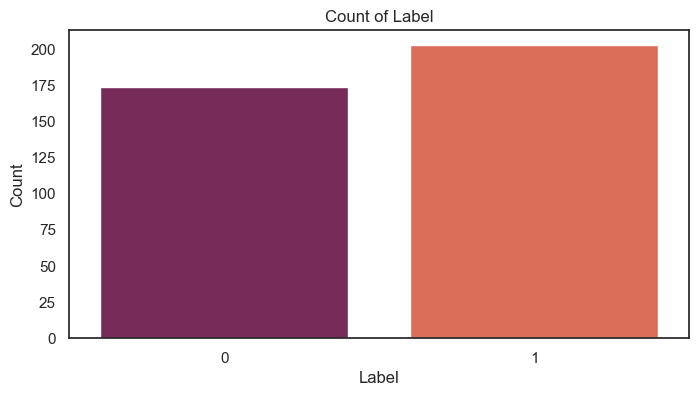

In [34]:
# plot label distribution

sns.set(style="white")


# Create a bar chart using seaborn with 'rocket' color palette
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='label', data=df, palette='rocket')
ax.set_title("Count of Label")
ax.set_xlabel("Label")
ax.set_ylabel("Count")

# Show the plot
plt.show()


### Descriptive Statistics

Now we will use statistical tools, especially from pandas to improve the understanding from the dataset, especially the numerical features. We have seen there are 25 numerical columns in the dataset, all of each are financial indicators from the companies. The function describe() returns information about the distribution of the data such as quantiles, min and max.

In [16]:
# statistical summary
df.describe()

,wr1,wr2,wr3,wr4,vol1,vol2,vol3,vol4,pe_ratio,debt_to_equity,...,profit_margin,free_cash_margin,volatility,cpi,interest_rate,unemployment_rate,sma,rsi,ema,label
count,377.000000,377.000000,377.000000,377.000000,3.770000e+02,3.770000e+02,3.770000e+02,3.770000e+02,377.000000,377.000000,...,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000
mean,0.005579,0.002203,0.004728,0.000958,6.326665e+06,6.068181e+06,5.712607e+06,5.634919e+06,34.729045,1.738515,...,7.463077,7.292891,0.025083,261.635610,1.284987,4.842175,107.088324,51.771255,107.117269,0.538462
std,0.048832,0.050238,0.055803,0.052587,2.395881e+07,2.253008e+07,1.712288e+07,1.504155e+07,136.713493,12.718879,...,189.321730,41.978400,0.009616,21.211174,1.461766,1.879027,97.359211,28.866274,97.345342,0.499181
min,-0.144415,-0.224578,-0.395924,-0.262849,4.070000e+04,4.040000e+04,5.150000e+04,4.010000e+04,-312.570000,-44.900000,...,-1614.130000,-500.620000,0.011583,233.707000,0.040000,3.400000,0.949233,0.000000,0.947321,0.000000
25%,-0.017238,-0.020542,-0.017582,-0.022450,9.200000e+05,8.350000e+05,8.187000e+05,8.536000e+05,13.270000,0.380000,...,3.240000,0.870000,0.018423,244.786000,0.100000,3.700000,43.856667,29.629630,43.700278,0.000000
50%,0.001679,0.000622,0.007581,0.001060,1.777600e+06,1.822700e+06,1.700100e+06,1.760500e+06,22.060000,0.720000,...,9.330000,11.260000,0.022806,256.558000,0.660000,4.300000,73.536667,52.044098,73.703333,1.000000
75%,0.023966,0.024866,0.031020,0.021871,4.210867e+06,4.753300e+06,4.053800e+06,4.260900e+06,34.040000,1.380000,...,15.710000,22.150000,0.029801,273.567000,1.910000,5.200000,137.907400,74.654956,137.658333,1.000000
max,0.377778,0.257657,0.302190,0.460810,4.048700e+08,3.883312e+08,2.198064e+08,1.546816e+08,2042.200000,199.910000,...,2247.750000,92.630000,0.088807,307.789000,5.330000,14.700000,678.780000,100.000000,675.968333,1.000000


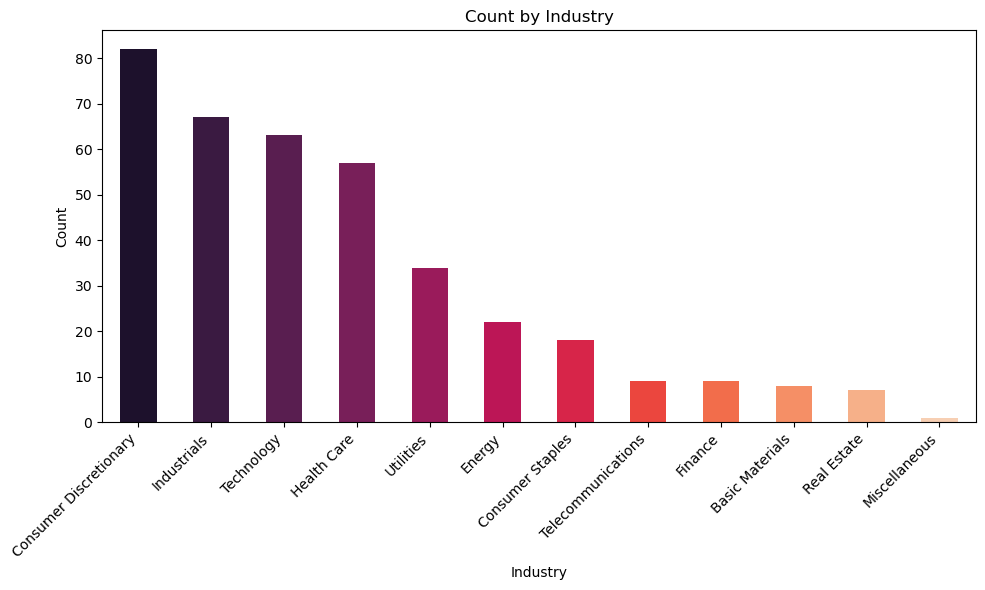

In [22]:
# Count the occurrences of each industry
industry_counts = df['industry'].value_counts()

# Sort the counts in descending order
industry_counts = industry_counts.sort_values(ascending=False)

# Define a color palette with as many colors as there are unique industries
colors = sns.color_palette('rocket', len(industry_counts))

# Plot the bar chart with different colors for each bar
plt.figure(figsize=(10, 6))
industry_counts.plot(kind='bar', color=colors)
plt.title('Count by Industry')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()

### Outliers and Correlations

We're going to look at the distrubition of the features to look for any egregious outliers that might make our data noisy

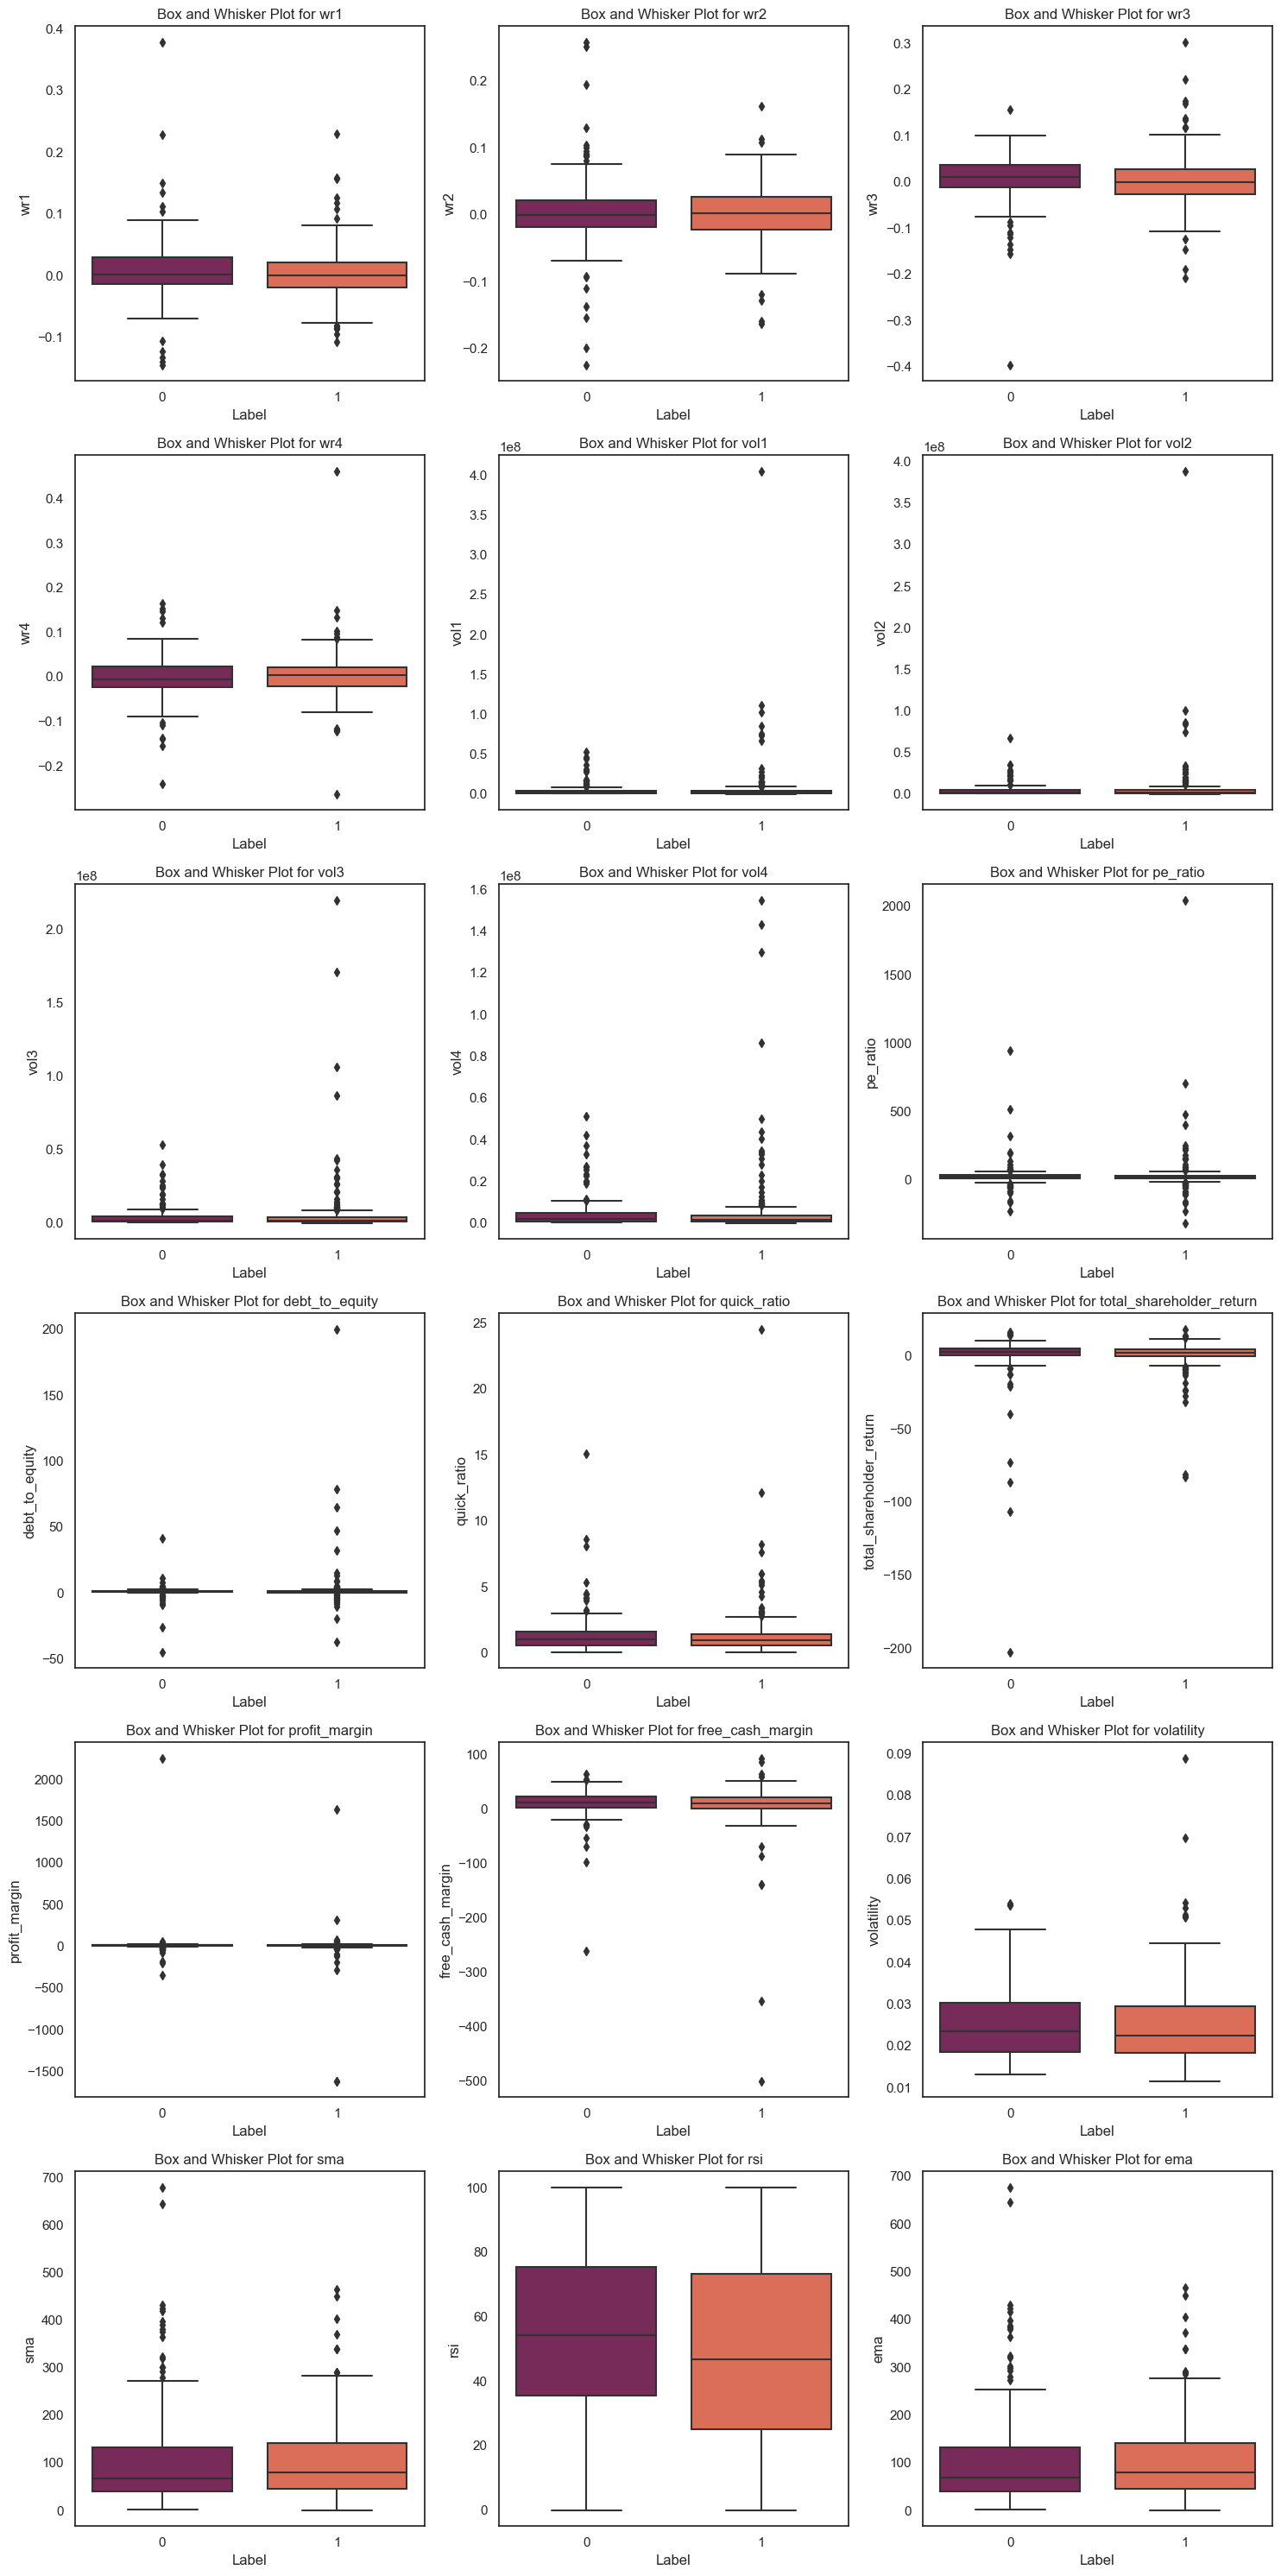

In [40]:
%matplotlib inline

# Assuming 'df' is your DataFrame
# If it's not already loaded, you should load your DataFrame here

# Select columns for the box plots
selected_columns = [col for col in df.columns if col not in ['industry', 'cpi', 'unemployment_rate', 'interest_rate', 'label']]

# Set the style for seaborn
sns.set(style="white")

# Create a box and whisker plot for each feature, separated by label
num_cols = 3
num_rows = -(-len(selected_columns) // num_cols)  # Ceiling division to get the number of rows

plt.figure(figsize=(15, 5 * num_rows))

for i, feature in enumerate(selected_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x='label', y=feature, data=df, palette='rocket')
    plt.title(f'Box and Whisker Plot for {feature}')
    plt.xlabel('Label')
    plt.ylabel(feature)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()



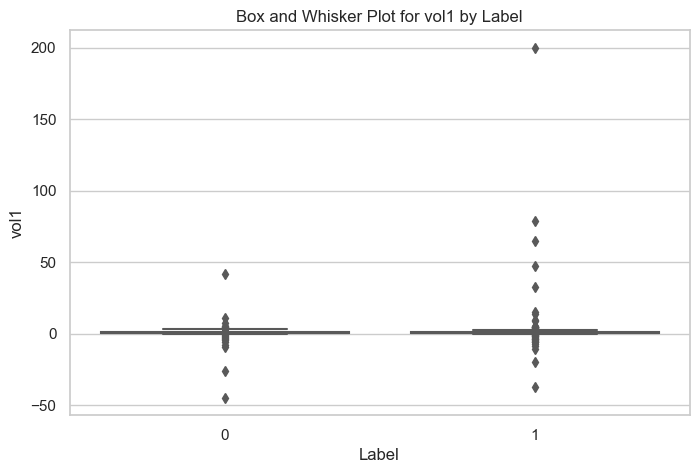

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# If it's not already loaded, you should load your DataFrame here

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a box and whisker plot for 'vol1'
plt.figure(figsize=(8, 5))
sns.boxplot(x='label', y='debt_to_equity', data=df, palette='Set2')
plt.title('Box and Whisker Plot for vol1 by Label')
plt.xlabel('Label')
plt.ylabel('vol1')

# Show the plot
plt.show()


In [45]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df['profit_margin'].describe()

count     377.000
mean        7.463
std       189.322
min     -1614.130
25%         3.240
50%         9.330
75%        15.710
max      2247.750
Name: profit_margin, dtype: float64

Correlation Matrix for Numerical Columns:
                            wr1    wr2    wr3    wr4   vol1   vol2   vol3  \
wr1                       1.000 -0.074 -0.053  0.009 -0.002 -0.023 -0.036   
wr2                      -0.074  1.000 -0.015  0.031 -0.077 -0.088 -0.078   
wr3                      -0.053 -0.015  1.000 -0.102 -0.028 -0.041 -0.045   
wr4                       0.009  0.031 -0.102  1.000 -0.020 -0.023 -0.008   
vol1                     -0.002 -0.077 -0.028 -0.020  1.000  0.983  0.897   
vol2                     -0.023 -0.088 -0.041 -0.023  0.983  1.000  0.903   
vol3                     -0.036 -0.078 -0.045 -0.008  0.897  0.903  1.000   
vol4                      0.018 -0.056 -0.030 -0.011  0.831  0.825  0.946   
pe_ratio                 -0.098  0.135  0.083  0.048 -0.016 -0.014 -0.010   
debt_to_equity            0.023 -0.067 -0.015  0.040 -0.016 -0.014 -0.020   
quick_ratio               0.017  0.075  0.013  0.093 -0.003  0.003  0.010   
total_shareholder_return -0.106 -0

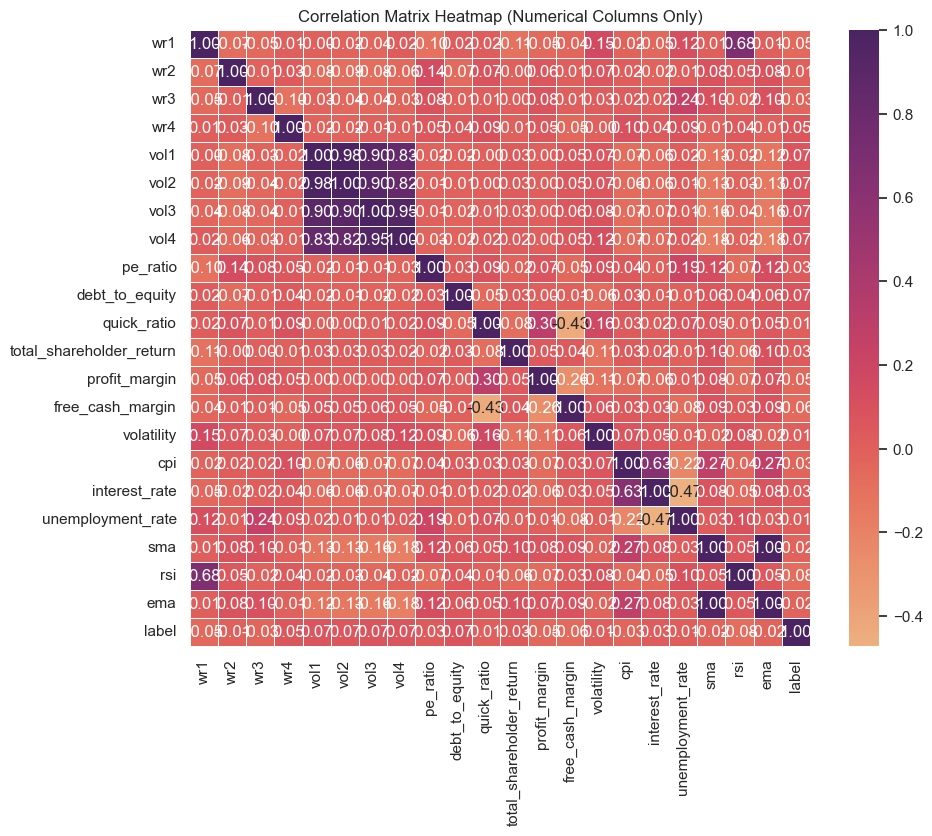

In [51]:
import pandas as pd
%matplotlib inline


# Assuming 'df' is your DataFrame
# If it's not already loaded, you should load your DataFrame here

# Select only numerical columns
numerical_columns = df.select_dtypes(include='number')

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_columns.corr()

# Display the correlation matrix
print("Correlation Matrix for Numerical Columns:")
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='flare', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap (Numerical Columns Only)')
plt.show()
